<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="Great_Learning_Logo.jpeg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Assignment Questions </b>
                </font>
            </div>
        </td>
    </tr>
</table>


### Program Offered: M. Tech / Data Science
### Course Title:  Machine Learning Supervised Classification (MLSC)

### Group Number: 16
### Name of the Project Members
- Tania Khan
- Vinod A
- Sandeep Ram
- Emmanuel Pradeep Aloysius

## Problem Statement



### About the data set (Rainfall Prediction data)

The dataset contains information about rainfall predictions. The aim is to find whether rainfall will occur or not based on the several parameters of the atmospheric conditions and profile. <br> Attribute information: 

**Date:** Dates on which rainfall occurred or not 

**Location:** Location where we want to classify rainfall occurrence.

**MinTemp:** Minimum temperature in that particular date

**MaxTemp:** Maximum temperature in that particular date

**Rainfall:** Rainfall occurrence level in cm

**Evaporation:** Evaporation value

**Sunshine:** Sunshine level in m

**WindGustDir:** Direction of wind

**WindGustSpeed:**  Wind Speed

**WindDir9am:** Wind direction at 9am

**WindDir3pm:** Wind direction at 3pm

**WindSpeed9am:** Wind speed at 9am

**WindSpeed3pm:** Wind speed at 3pm

**Humidity9am:** Humidity at 9am

**Humidity3pm:** Humidity at 3pm

**Pressure9am:** Pressure at 9am

**Pressure3pm:** Pressure at 9am

**Cloud9am:** Cloud Cover at 9am

**Cloud3pm:** Cloud Cover at 3pm

**Temp9am:** Temperature at 9am

**Temp3pm:** Temperature at 3pm

**RainToday:** Rain fall happened or not today

**RainTomorrow:** Does tomorrow rainfall will happen or not: Yes(1) or No(0)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
    - 3.1 - **[Identify the Best Cut-off Value](#cut_off)**
        - 3.1.1 - **[Youden's Index](#youden)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [106]:
import numpy as np
import pandas as pd
import random
pd.options.display.max_rows = None
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from datetime import datetime
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# for inline plots in jupyter
# %matplotlib inline
# %config InlineBackend.figure_format='retina'

# helper class to print in bold and colors
class ptext:
    PURPLE = "\033[95m"
    CYAN = "\033[96m"
    DARKCYAN = "\033[36m"
    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    RED = "\033[91m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"
    END = "\033[0m"

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [2]:
data = pd.read_csv("Rainfall_prediction_data.csv")
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-03-2012,Wollongong,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,...,69.0,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,Yes,Yes
1,06-01-2011,PerthAirport,18.5,25.9,16.0,5.4,11.8,WSW,39.0,SSW,...,60.0,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,Yes,No
2,29-06-2014,Penrith,8.7,16.5,0.0,NaN,NaN,WNW,56.0,WNW,...,41.0,41.0,NaN,NaN,NaN,NaN,13.1,15.1,No,No


**Let us now see the number of variables and observations in the data.**

In [3]:
print(f"{ptext.RED}No of Observations in the dataset - {ptext.END}",len(data))
print(f"{ptext.RED}No of Variables in the dataset - {ptext.END}",len(data.columns))

No of Observations in the dataset -  1040
No of Variables in the dataset -  23


<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [128]:
data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
Year               int64
Month              int64
Day                int64
dtype: object


In [5]:
print(f"{ptext.RED}No of Numeric Variables in the dataset - {ptext.END}",len(data.select_dtypes(exclude='object').columns))
print(f"{ptext.RED}No of Categorical Variables in the dataset - {ptext.END}",len(data.select_dtypes(include='object').columns))
print(f"{ptext.RED}Data type for Date feature is shown as Object and it need to be converted to datetime data type {ptext.END}")

No of Numeric Variables in the dataset -  16
No of Categorical Variables in the dataset -  7
Data type for Date feature is shown as Object and it need to be converted to datetime data type 


#### Change the data type as per the data definition.

In [6]:
print(f"{ptext.BLUE}{ptext.BOLD}Convert data type of Date feature to datetime data type {ptext.END}")

Convert data type of Date feature to datetime data type 


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [8]:
print(f"{ptext.BLUE}{ptext.BOLD}Check the dataset. Year, Month and Day are shown as separate numerical variables {ptext.END}")
data.head()

Check the dataset. Year, Month and Day are shown as separate numerical variables 


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2012-07-03,Wollongong,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,...,1017.6,1.0,8.0,17.4,15.6,Yes,Yes,2012,7,3
1,2011-06-01,PerthAirport,18.5,25.9,16.0,5.4,11.8,WSW,39.0,SSW,...,1003.6,7.0,1.0,22.2,25.1,Yes,No,2011,6,1
2,2014-06-29,Penrith,8.7,16.5,0.0,NaN,NaN,WNW,56.0,WNW,...,NaN,NaN,NaN,13.1,15.1,No,No,2014,6,29
3,2008-12-16,Cairns,25.5,33.9,0.2,5.0,7.0,SSE,41.0,SSE,...,1007.4,6.0,5.0,30.8,31.5,No,No,2008,12,16
4,2015-04-21,SalmonGums,3.8,23.0,0.0,NaN,NaN,N,28.0,NE,...,NaN,NaN,NaN,14.0,21.1,No,No,2015,4,21


#### Recheck the data type after the conversion. 

In [9]:
print(f"{ptext.BLUE}{ptext.BOLD}Check data type of date features, it is now converted to datetime datatype  {ptext.END}")

Check data type of date features, it is now converted to datetime datatype  


In [10]:
data.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Year                      int64
Month                     int64
Day                       int64
dtype: object

<a id="drop"></a>
## 2.3 Remove Insignificant Variables, if its applicable.

In [11]:
print(f"{ptext.BLUE}{ptext.BOLD} As the date variable is used to separate out the Year, Month and Day, data variable is no more required{ptext.END}")

 As the date variable is used to separate out the Year, Month and Day, data variable is no more required


In [12]:
data.drop(['Date'],axis=1,inplace=True)

In [13]:
print(f"{ptext.BLUE}{ptext.BOLD} Date variable is now dropped {ptext.END}")
data.head(1)

 Date variable is now dropped 


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Wollongong,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,SW,...,1017.6,1.0,8.0,17.4,15.6,Yes,Yes,2012,7,3


<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

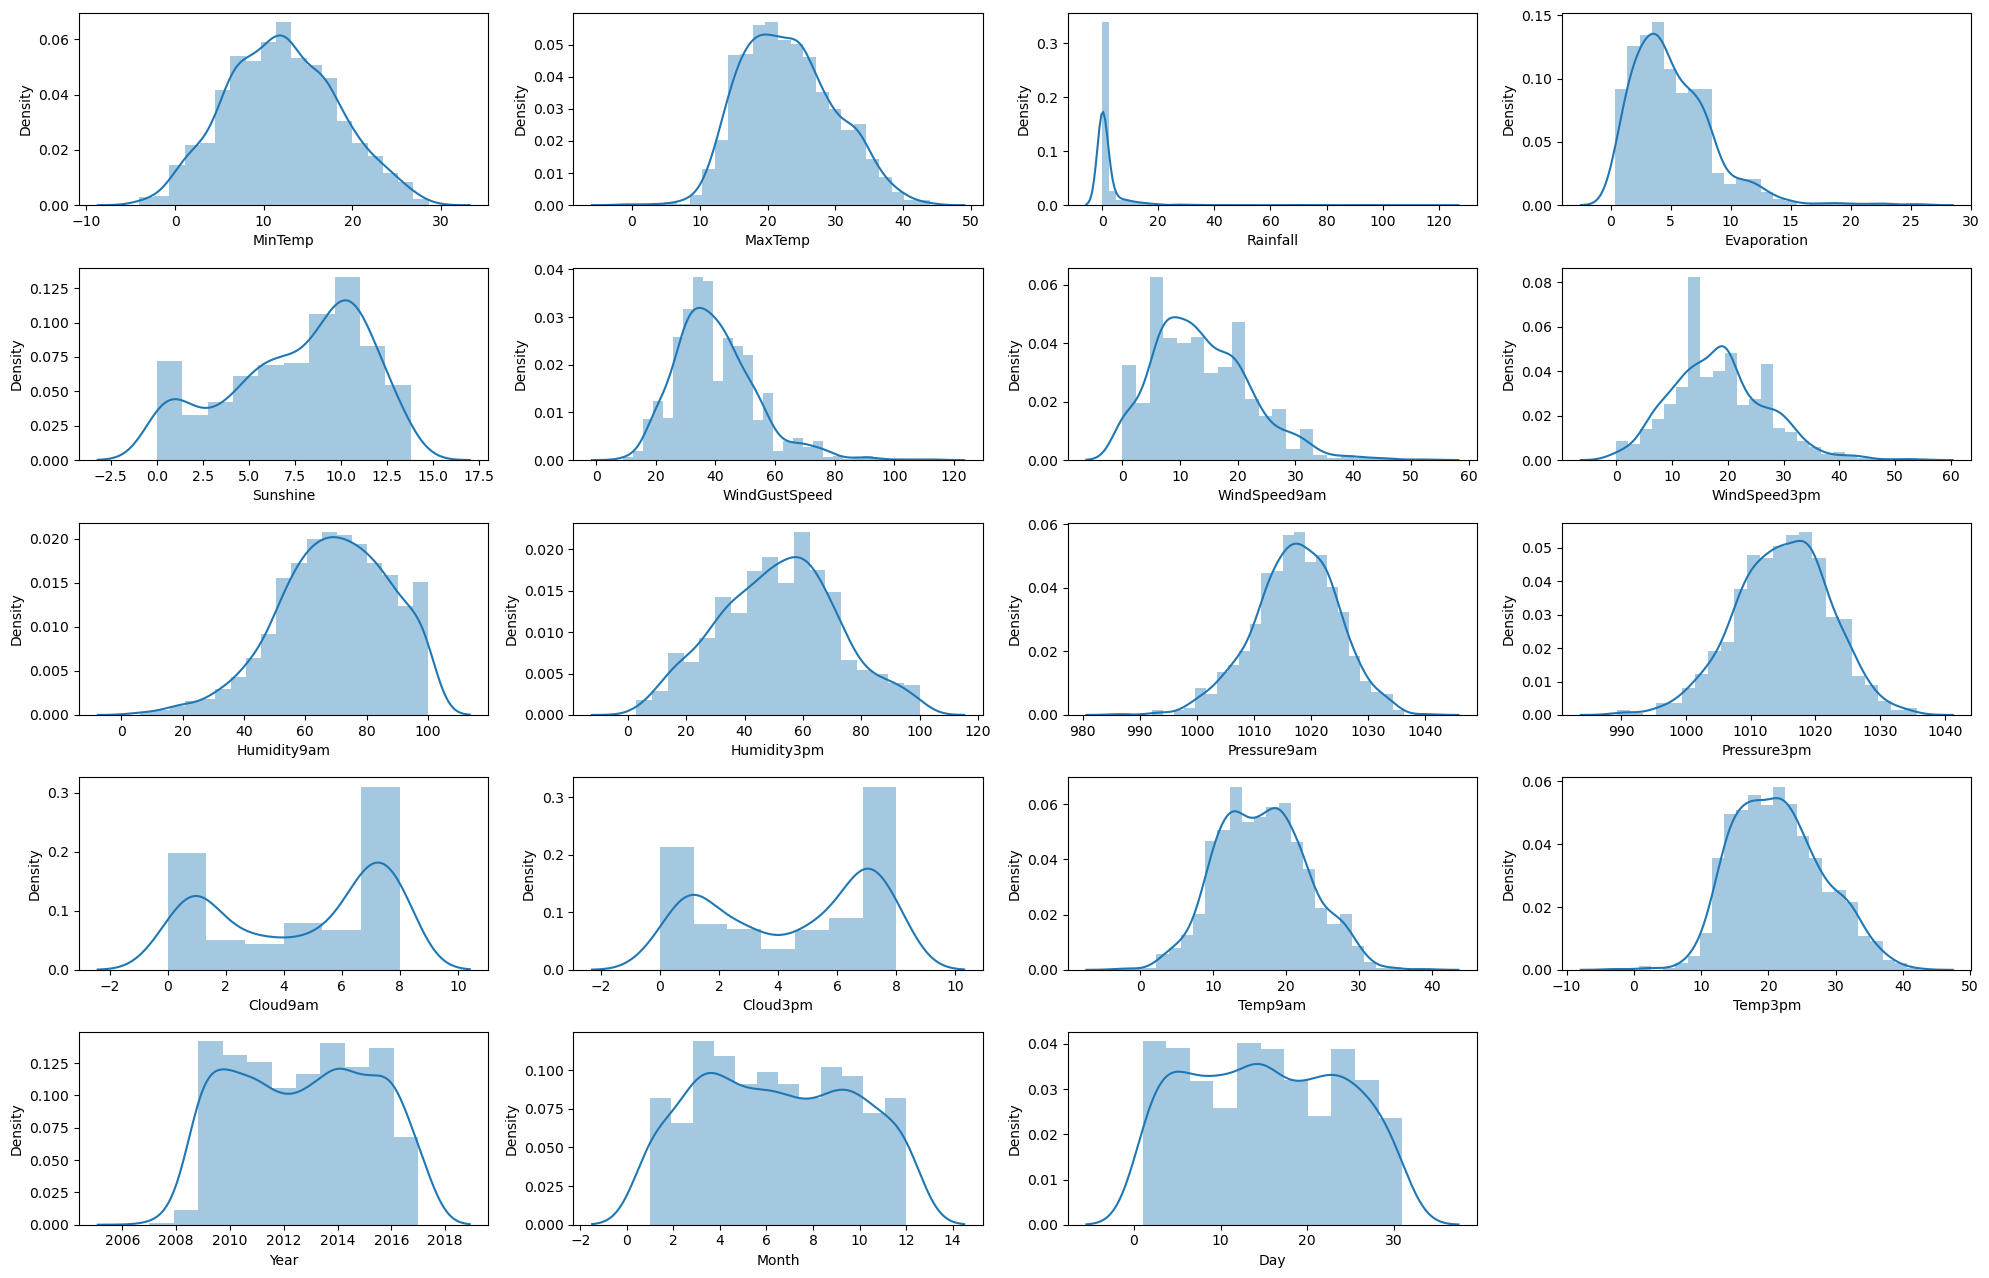

In [14]:
plt.figure(figsize=(20,15))
for i, col in enumerate(data.select_dtypes(exclude='object')):
    plt.subplot(round(len(data.select_dtypes(exclude='object').columns)/4)+1, 4, i+1)
    sns.distplot(data[col])
plt.tight_layout()
plt.show()

In [15]:
print(f"{ptext.RED}{ptext.BOLD} Most of the variables are close to normal distribution {ptext.END}")

 Most of the variables are close to normal distribution 


**Distribution of categoric independent variable.**

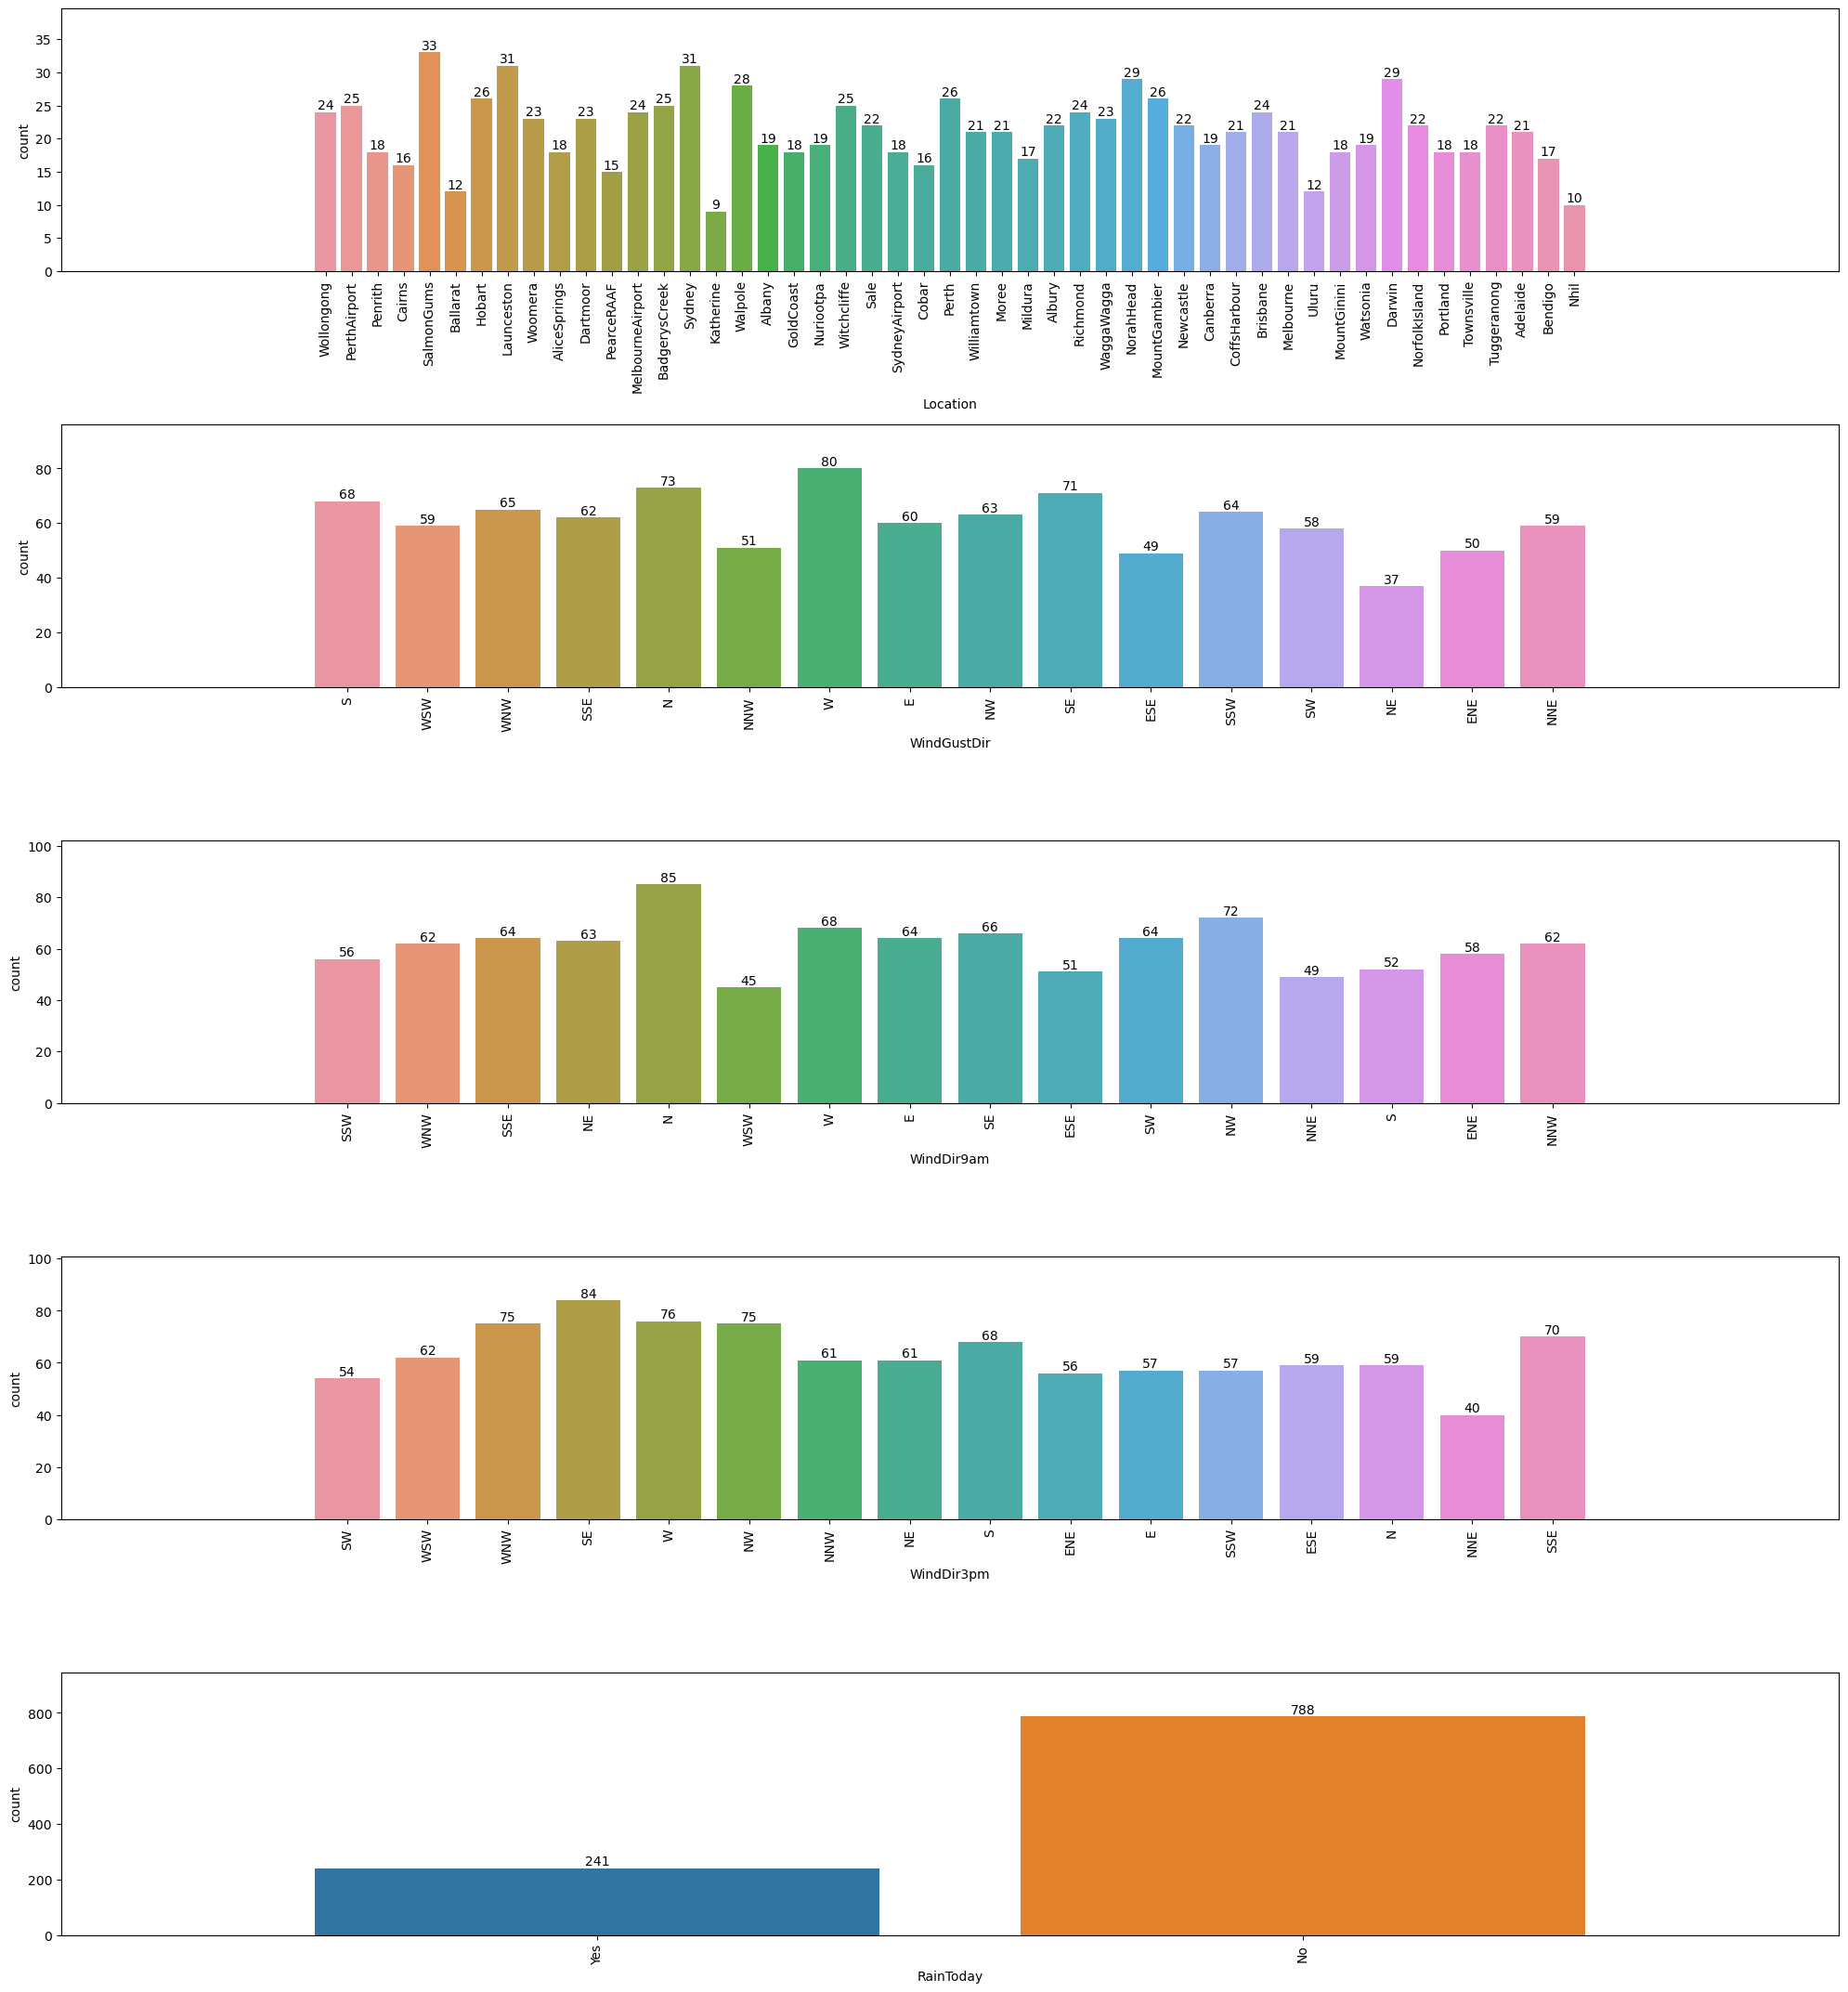

In [16]:
plt.figure(figsize=(20, 30))
for i, col in enumerate((data.drop(columns='RainTomorrow')).select_dtypes(include='object')):
    plt.subplot(round(len(data.select_dtypes(include='object').columns))+1, 1, i+1)
    ax = sns.countplot(x=data[col])
    ax.bar_label(ax.containers[0])
    ax.margins(0.2)
    plt.xticks(rotation=90)    
plt.tight_layout()
plt.show()

In [17]:
print(f"{ptext.BLUE}{ptext.BOLD} Except RainToday varibles, all the other categorical varilables are balanced{ptext.END}")

 Except RainToday varibles, all the other categorical varilables are balanced


#### Distribution of dependent variable.

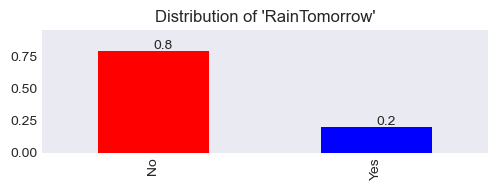

In [18]:
fig = plt.figure(figsize = (5,2))
plt.style.use("seaborn-dark")
ax = data['RainTomorrow'].value_counts(normalize=True).plot(kind='bar',color=['red','blue'])
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)), (i.get_x()+i.get_width()/2 , i.get_height()+.01 ))

plt.xticks(rotation=90)
plt.title(f"Distribution of 'RainTomorrow'")
ax.margins(0.2)
plt.tight_layout()
plt.show()

In [19]:
print(f"{ptext.BLUE}{ptext.BOLD} Dependent Variable RainTomorrow has imbalance data{ptext.END}")

 Dependent Variable RainTomorrow has imbalance data


<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

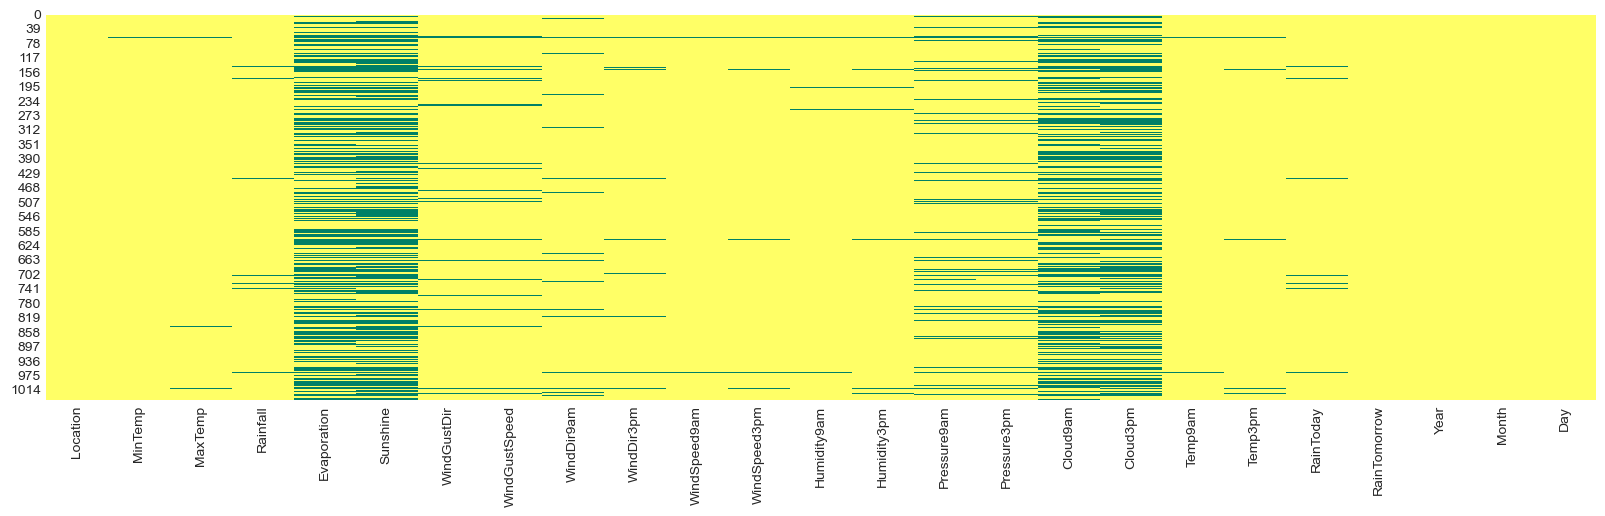

In [20]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull(),cbar=False,cmap='summer_r')
plt.show()

In [21]:
print(f"{ptext.BLUE}{ptext.BOLD} Missing Data{ptext.END}")
Missing_Values = data.isnull().sum().sort_values(ascending=False)
Percentage = Missing_Values/len(data)
Missing_data = pd.concat([Missing_Values,Percentage],axis=1,keys=['Missing_Values','Percentage'])
Missing_data

 Missing Data


,Missing_Values,Percentage
Sunshine,507,0.487500
Evaporation,458,0.440385
Cloud3pm,443,0.425962
Cloud9am,427,0.410577
Pressure9am,111,0.106731
Pressure3pm,108,0.103846
WindGustDir,71,0.068269
WindGustSpeed,71,0.068269
WindDir9am,59,0.056731
WindDir3pm,26,0.025000


In [22]:
print(f"{ptext.BLUE}{ptext.BOLD} Impute the Categorical Variables with mode {ptext.END}")
for i in data.select_dtypes(include='object').columns:
    data[i] = data[i].fillna(data[i].mode()[0])

 Impute the Categorical Variables with mode 


In [23]:
num_v = data.select_dtypes(exclude='object')
cat_v = data.select_dtypes(include='object')

In [24]:
print(f"{ptext.BLUE}{ptext.BOLD} Imputation of numerical variables using KNN Imputer {ptext.END}")

 Imputation of numerical variables using KNN Imputer 


In [25]:
from sklearn.impute import KNNImputer
num_vm = KNNImputer(n_neighbors=4).fit_transform(num_v)

In [26]:
num_vm = pd.DataFrame(num_vm,columns=list(data.select_dtypes(exclude='object').columns))
num_vm.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,16.0,20.4,8.2,4.5,4.3,63.0,39.0,20.0,69.0,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,2012.0,7.0,3.0
1,18.5,25.9,16.0,5.4,11.8,39.0,20.0,22.0,60.0,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,2011.0,6.0,1.0


 Check the Imputation of all numerica missing values 


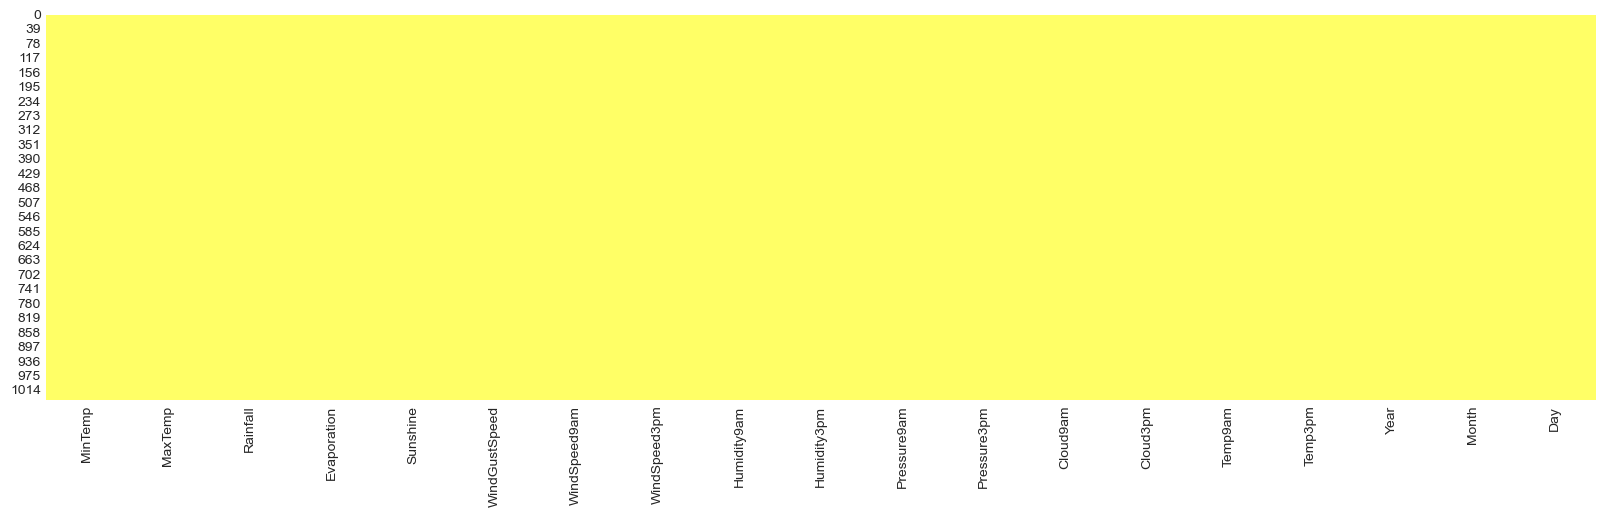

In [27]:
print(f"{ptext.BLUE}{ptext.BOLD} Check the Imputation of all numerica missing values {ptext.END}")
plt.figure(figsize=(20,5))
sns.heatmap(num_vm.isnull(),cbar=False,cmap='summer_r')
plt.show()

In [28]:
print(f"{ptext.BLUE}{ptext.BOLD} Combine the imputed categorical and numerical variables {ptext.END}")

 Combine the imputed categorical and numerical variables 


In [29]:
cat_v.reset_index(drop=True,inplace=True)
dataAfterImp = pd.concat([cat_v,num_vm],axis=1)
dataAfterImp.head(2)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,Wollongong,S,SSW,SW,Yes,Yes,16.0,20.4,8.2,4.5,...,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,2012.0,7.0,3.0
1,PerthAirport,WSW,SSW,WSW,Yes,No,18.5,25.9,16.0,5.4,...,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,2011.0,6.0,1.0


In [30]:
print(f"{ptext.BLUE}{ptext.BOLD} Check the final imputed dataset {ptext.END}")
dataAfterImp.info()

 Check the final imputed dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       1040 non-null   object 
 1   WindGustDir    1040 non-null   object 
 2   WindDir9am     1040 non-null   object 
 3   WindDir3pm     1040 non-null   object 
 4   RainToday      1040 non-null   object 
 5   RainTomorrow   1040 non-null   object 
 6   MinTemp        1040 non-null   float64
 7   MaxTemp        1040 non-null   float64
 8   Rainfall       1040 non-null   float64
 9   Evaporation    1040 non-null   float64
 10  Sunshine       1040 non-null   float64
 11  WindGustSpeed  1040 non-null   float64
 12  WindSpeed9am   1040 non-null   float64
 13  WindSpeed3pm   1040 non-null   float64
 14  Humidity9am    1040 non-null   float64
 15  Humidity3pm    1040 non-null   float64
 16  Pressure9am    1040 non-null   float64
 17  Pressure3pm    104

#### Balancing of Imbalance data in Dependent Variable RainTomorrow using Over Samplying 

In [31]:
print(f"{ptext.BLUE}{ptext.BOLD} Replace Yes and No in variables RainToday and RainTomorrow to 1 and 0{ptext.END}")

 Replace Yes and No in variables RainToday and RainTomorrow to 1 and 0


In [32]:
dataAfterImp['RainToday'].replace({'No':0,'Yes':1},inplace=True)
dataAfterImp['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)
dataAfterImp.head(3)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,Wollongong,S,SSW,SW,1,1,16.0,20.4,8.2,4.5,...,92.0,1018.500,1017.6,1.00,8.0,17.4,15.6,2012.0,7.0,3.0
1,PerthAirport,WSW,SSW,WSW,1,0,18.5,25.9,16.0,5.4,...,36.0,1004.600,1003.6,7.00,1.0,22.2,25.1,2011.0,6.0,1.0
2,Penrith,WNW,WNW,WNW,0,0,8.7,16.5,0.0,6.3,...,41.0,1019.975,1018.3,4.75,4.0,13.1,15.1,2014.0,6.0,29.0


In [33]:
print(f"{ptext.BLUE}{ptext.BOLD} Separating RainTomorrow Yes and No into separate dataset{ptext.END}")

 Separating RainTomorrow Yes and No into separate dataset


In [34]:
raintom_yes = dataAfterImp[dataAfterImp['RainTomorrow']==1]
raintom_no = dataAfterImp[dataAfterImp['RainTomorrow']==0]

In [35]:
print(f"{ptext.BLUE}{ptext.BOLD} Oversample the Yes dataset using resample function in sklearn.utils{ptext.END}")

 Oversample the Yes dataset using resample function in sklearn.utils


In [36]:
from sklearn.utils import resample
raintom_yes_resample = resample(raintom_yes,n_samples=len(raintom_no),random_state=50)
len(raintom_yes_resample),len(raintom_no)

(829, 829)

In [37]:
print(f"{ptext.BLUE}{ptext.BOLD} Combine the oversampled Yes data with No data into a Dataframe{ptext.END}")

 Combine the oversampled Yes data with No data into a Dataframe


In [38]:
data_oversam = pd.concat([raintom_no,raintom_yes_resample])

In [39]:
print(f"{ptext.BLUE}{ptext.BOLD} Check the number of data in the new dataframe, Yes and no are having the same lenght{ptext.END}")

 Check the number of data in the new dataframe, Yes and no are having the same lenght


In [40]:
len(data_oversam),data_oversam['RainTomorrow'].value_counts()

(1658,
 0    829
 1    829
 Name: RainTomorrow, dtype: int64)

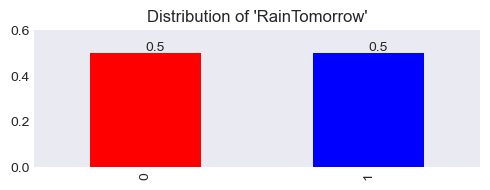

In [41]:
fig = plt.figure(figsize = (5,2))
plt.style.use("seaborn-dark")
ax = data_oversam['RainTomorrow'].value_counts(normalize=True).plot(kind='bar',color=['red','blue'])
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)), (i.get_x()+i.get_width()/2 , i.get_height()+.01 ))
plt.xticks(rotation=90)
plt.title(f"Distribution of 'RainTomorrow'")
ax.margins(0.2)
plt.tight_layout()
plt.show()

<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [42]:
print(f"{ptext.BLUE}{ptext.BOLD} Separating Dependent and Independent variables into separate datasets {ptext.END}")
ind = data_oversam.drop("RainTomorrow",axis=1)
dep = data_oversam['RainTomorrow']

 Separating Dependent and Independent variables into separate datasets 


In [43]:
ind.head(2)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
1,PerthAirport,WSW,SSW,WSW,1,18.5,25.9,16.0,5.4,11.800,...,36.0,1004.600,1003.6,7.00,1.0,22.2,25.1,2011.0,6.0,1.0
2,Penrith,WNW,WNW,WNW,0,8.7,16.5,0.0,6.3,7.425,...,41.0,1019.975,1018.3,4.75,4.0,13.1,15.1,2014.0,6.0,29.0


#### Filter numerical and categorical variables.

In [44]:
print(f"{ptext.BLUE}{ptext.BOLD} Separating the numerical and categorical independent variables and checking the same  {ptext.END}")

 Separating the numerical and categorical independent variables and checking the same  


In [45]:
num_v = ind.select_dtypes(exclude='object')
cat_v = ind.select_dtypes(include='object')

In [46]:
num_v.dtypes

RainToday          int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
Year             float64
Month            float64
Day              float64
dtype: object

In [47]:
cat_v.dtypes

Location       object
WindGustDir    object
WindDir9am     object
WindDir3pm     object
dtype: object

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [48]:
cat_vd = pd.get_dummies(cat_v,drop_first=True)

In [49]:
cat_vd = cat_vd.reset_index()
cat_vd.head(2)

,index,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
cat_vd.shape

(1658, 94)

<a id="scale"></a>
## 2.7 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [51]:
from sklearn.preprocessing import StandardScaler
num_vs = pd.DataFrame(StandardScaler().fit_transform(num_v),columns=list(num_v.columns))

In [52]:
num_vs.head(2)

,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,1.425159,1.003868,0.525441,1.615135,0.222588,1.545223,-0.224792,0.646693,0.328144,-0.761238,-1.043169,-1.594207,-1.437588,0.756792,-1.696128,0.916484,0.664002,-0.683006,-0.086336,-1.715080
1,-0.701676,-0.588495,-0.850503,-0.389150,0.536177,0.288026,0.889618,0.531546,0.328144,-1.854553,-0.809805,0.557036,0.639308,-0.140392,-0.440737,-0.593176,-0.819321,0.493335,-0.086336,1.590886


In [53]:
num_vs.shape

(1658, 20)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [54]:
ind_pre = pd.concat([num_vs,cat_vd],axis=1)
ind_pre.head(2)

,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,1.425159,1.003868,0.525441,1.615135,0.222588,1.545223,-0.224792,0.646693,0.328144,-0.761238,...,0,0,0,0,0,0,0,0,0,1
1,-0.701676,-0.588495,-0.850503,-0.389150,0.536177,0.288026,0.889618,0.531546,0.328144,-1.854553,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

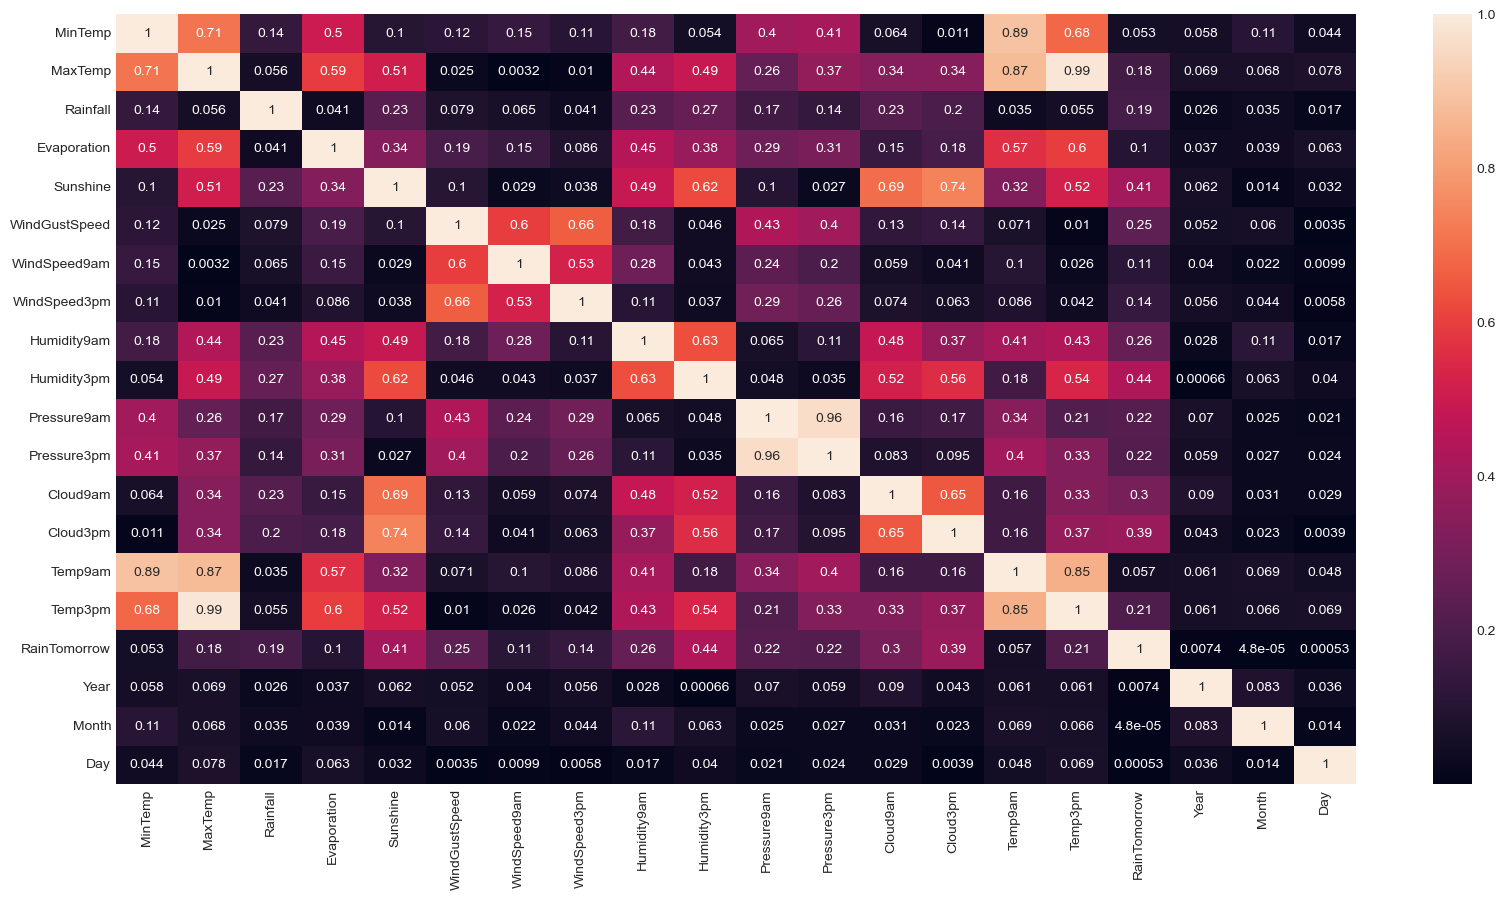

In [55]:
data['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)
plt.figure(figsize=(20,10))
sns.heatmap(abs(data.corr()), annot=True)

In [56]:
ind_pre.drop(columns=['Day'], inplace=True)
print(f"{ptext.BLUE}{ptext.BOLD} Removing Day variable as it doesn't exhibit much co-relation  {ptext.END}")

 Removing Day variable as it doesn't exhibit much co-relation  


<a id="split"></a>
## 2.8 Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(ind_pre,dep,test_size=0.2,random_state=42,stratify=dep,)

In [58]:
print(f"{ptext.BLUE}{ptext.BOLD} Check the shape of the train dataset  {ptext.END}")

 Check the shape of the train dataset  


In [59]:
xtrain.shape,ytrain.shape

((1326, 113), (1326,))

In [60]:
print(f"{ptext.BLUE}{ptext.BOLD} Check the shape of the test dataset  {ptext.END}")

 Check the shape of the test dataset  


In [61]:
xtest.shape,ytest.shape

((332, 113), (332,))

In [62]:
xtrain.head(2)

,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
528,-0.701676,1.442580,1.637906,-0.389150,1.058825,0.539466,0.627404,-0.389627,-1.185890,1.540479,...,0,0,0,0,0,0,0,0,0,0
1498,1.425159,0.841382,-0.528473,0.888582,-0.543963,-1.572624,0.365190,1.337573,-0.487105,1.540479,...,0,0,0,0,0,0,1,0,0,0


In [63]:
ytrain.head(2)

665    0
803    1
Name: RainTomorrow, dtype: int64

<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [65]:
from sklearn.metrics import accuracy_score
ytrain_pred = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain_pred,ytrain)
print(f"{ptext.BLUE}{ptext.BOLD} Training Data Accurracy:{ptext.END}",round(training_data_accuracy,2)*100)

ytest_pred = model.predict(xtest)
testing_data_accuracy = accuracy_score(ytest_pred,ytest)
print(f"{ptext.BLUE}{ptext.BOLD} Testing Data Accurracy:{ptext.END}",round(testing_data_accuracy,2)*100)

 Training Data Accurracy: 79.0
 Testing Data Accurracy: 77.0


In [66]:
print(f"{ptext.BLUE}{ptext.BOLD}{ptext.UNDERLINE} Logistics Regression Summary Results{ptext.END}")

 Logistics Regression Summary Results


In [67]:
import statsmodels.api as sm
logreg = sm.Logit(np.array(ytrain),np.array(xtrain)).fit()
print(logreg.summary())

         Current function value: 0.348321
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1326
Model:                          Logit   Df Residuals:                     1213
Method:                           MLE   Df Model:                          112
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.4975
Time:                        22:13:34   Log-Likelihood:                -461.87
converged:                      False   LL-Null:                       -919.11
Covariance Type:            nonrobust   LLR p-value:                4.821e-126
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4049      0.131      3.098      0.002       0.149       0.661
x2            -0.1507      0.356     -0.424      0.672      -0.84

/Users/vinod.arokiya.raj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [68]:
print(f"{ptext.BLUE}{ptext.BOLD} AIC:{ptext.END}",round(logreg.aic,2))

 AIC: 1149.75


We can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable 

In [69]:
logreg_df = pd.DataFrame(logreg.params)
logreg_df["Features"] = np.array(xtrain.columns)
logreg_df.sort_values(0,ascending=False)

,0,Features
22,2.685308,Location_AliceSprings
50,2.507195,Location_Perth
27,2.452937,Location_Cairns
64,2.394966,Location_Williamtown
10,2.268314,Humidity3pm
39,2.242545,Location_Mildura
26,1.845341,Location_Brisbane
61,1.772286,Location_WaggaWagga
90,1.563821,WindDir9am_S
11,1.560634,Pressure9am


**Interpretation:** 


In [70]:
for i in range(len(logreg_df)):
    print(str(i+1)+". "+logreg_df.iloc[i,1]+" = "+str(round(logreg_df.iloc[i,0],2))+",it implies that the odds of getting rain tomorrow increases by a factor of "+str(round(logreg_df.iloc[i,0],2))+" due to one unit increase in"+logreg_df.iloc[i,1]+", keeping other variables constant\n")

1. RainToday = 0.4,it implies that the odds of getting rain tomorrow increases by a factor of 0.4 due to one unit increase inRainToday, keeping other variables constant

2. MinTemp = -0.15,it implies that the odds of getting rain tomorrow increases by a factor of -0.15 due to one unit increase inMinTemp, keeping other variables constant

3. MaxTemp = -0.33,it implies that the odds of getting rain tomorrow increases by a factor of -0.33 due to one unit increase inMaxTemp, keeping other variables constant

4. Rainfall = -0.16,it implies that the odds of getting rain tomorrow increases by a factor of -0.16 due to one unit increase inRainfall, keeping other variables constant

5. Evaporation = -0.04,it implies that the odds of getting rain tomorrow increases by a factor of -0.04 due to one unit increase inEvaporation, keeping other variables constant

6. Sunshine = -0.29,it implies that the odds of getting rain tomorrow increases by a factor of -0.29 due to one unit increase inSunshine, ke

**Do predictions on the test set.**

In [71]:
y_pred_test = logreg.predict(xtest)
y_pred_test.head()

726     0.156384
524     0.034623
1620    0.469889
461     0.074001
1630    0.887263
dtype: float64

In [72]:
y_pred_testdata = [0 if i<0.5 else 1 for i in y_pred_test]
y_pred_testdata[0:10]

[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

#### Plot the confusion matrix.

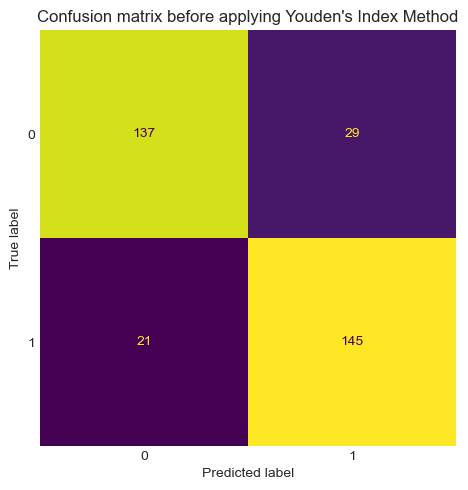

In [88]:
cm = confusion_matrix(ytest,y_pred_testdata)

TP = cm[1,1] # True Positive
FP = cm[0,1] # False Positive 
TN = cm[0,0] # True Negative
FN = cm[1,0] # False Negative

conf_mat = pd.DataFrame(cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
ConfusionMatrixDisplay(cm)
cm = confusion_matrix(ytest,y_pred_testdata)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(colorbar=False)
plt.tight_layout()
plt.title("Confusion matrix before applying Youden's Index Method")
plt.margins(1)
plt.show()

In [115]:
print(f"{ptext.BLUE}{ptext.BOLD} True Positive:  {ptext.END}",TP)
print(f"{ptext.BLUE}{ptext.BOLD} False Positive:  {ptext.END}",FP)
print(f"{ptext.BLUE}{ptext.BOLD} True Negative:  {ptext.END}",TN)
print(f"{ptext.BLUE}{ptext.BOLD} False Negative:  {ptext.END}",FN)


 True Positive:   145
 False Positive:   29
 True Negative:   137
 False Negative:   21


**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [116]:
print(f"{ptext.BLUE}{ptext.BOLD} Precision:  {ptext.END}",round(precision_score(ytest,y_pred_testdata),2))

 Precision:   0.83


**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [117]:
print(f"{ptext.BLUE}{ptext.BOLD} Recall:  {ptext.END}",round(recall_score(ytest,y_pred_testdata),2))

 Recall:   0.87


**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [118]:
specificity = TN/(FP+TN)
print(f"{ptext.BLUE}{ptext.BOLD} Specificity:  {ptext.END}",round(specificity,2))

 Specificity:   0.83


**f1-score:** It is defined as the harmonic mean of precision and recall.

In [119]:
print(f"{ptext.BLUE}{ptext.BOLD} F1_Score:  {ptext.END}",round(f1_score(ytest, y_pred_testdata),2))

 F1_Score:   0.85


**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [120]:
print(f"{ptext.BLUE}{ptext.BOLD} Accuracy:  {ptext.END}",round(accuracy_score(ytest, y_pred_testdata),2))

 Accuracy:   0.85


**Interpretation:** Write inference regarding the accuracy of the logistic regression model.

#### Predicability of Tormorrow Rainfall is 85%

We can also calculate the above measures using the `classification_report()`

In [121]:
from sklearn.metrics import classification_report
eval_table = classification_report(ytest,y_pred_testdata)
print(eval_table)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       166
           1       0.83      0.87      0.85       166

    accuracy                           0.85       332
   macro avg       0.85      0.85      0.85       332
weighted avg       0.85      0.85      0.85       332



- The model achieved an overall accuracy of 0.82, which means that it correctly predicted the class labels of 82% of the instances in the dataset.
- Looking at the precision and recall values, we can see that the model performed similarly for both classes.
- For class 0, the precision is 0.82 and the recall is 0.83, meaning that 82% of the instances classified as 0 were actually 0, and the model correctly identified 83% of all instances that were actually 0.
- For class 1, the precision is 0.83 and the recall is 0.81, meaning that 83% of the instances classified as 1 were actually 1, and the model correctly identified 81% of all instances that were actually 1.
- The f1-score gives an overall measure of the model's performance.The f1-score for class 0 is 0.82, and for class 1 is 0.82, indicating that the model has a similar overall performance for both classes

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [122]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(ytest,y_pred_testdata)
print(f"{ptext.BLUE}{ptext.BOLD} Kappa Score:  {ptext.END}",round(kappa,2))


 Kappa Score:   0.7


**Interpretation:** Write the inference based on the kappa score value and this model falls under which agreeemnet.

- A kappa score of 0.64 shows that the model's predictions has a substantial level of agreement 
- Generally, a kappa score between 0.6 and 0.8 is considered to represent substantial agreement
- Therefore, based on the kappa score of 0.7, we can infer that the model's predictions are reliable with a substantial level of agreement between the predicted and actual labels.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

In [123]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(ytest,y_pred_test)

 AUC:   0.91


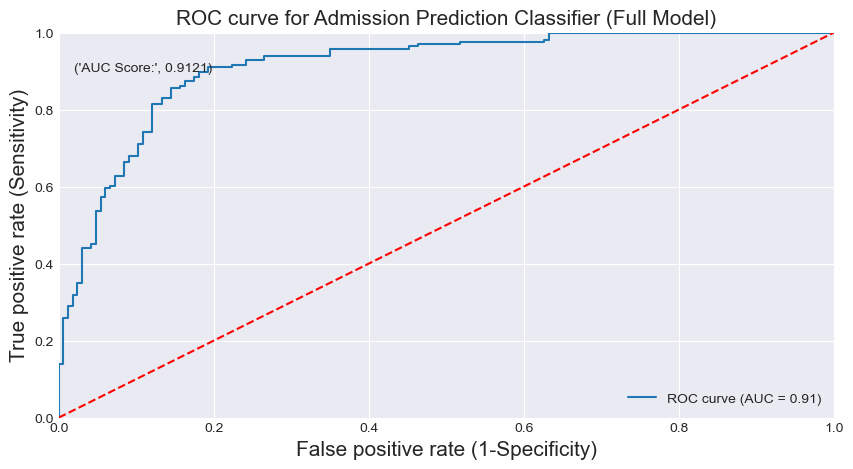

In [124]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(ytest,y_pred_test)
roc_auc = roc_auc_score(ytest, y_pred_test)

# plot the ROC curve
plt.figure(figsize = (10,5))
plt.plot(fpr, tpr,label="ROC curve (AUC = %0.2f)" % roc_auc)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 

plt.legend(loc="lower right")                         
# plot the grid
plt.grid(True)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest,y_pred_test),4)))
print(f"{ptext.BLUE}{ptext.BOLD} AUC:  {ptext.END}",round(roc_auc_score(ytest,y_pred_test),2))

**Interpretation:** Provide inference based on the obtained ROC curve and AUC score.

### Accruate Prediction ability of Tomorrow Rainfall is 91%

An AUC score of **0.91** indicates that the model has a good to excellent ability to distinguish between positive and negative classes in the dataset.

The AUC score measures the performance of a binary classification model across all possible classification thresholds, and a score of **0.91** indicates that the model has a high true positive rate (TPR) and a low false positive rate (FPR) across a range of classification thresholds.

Generally, an AUC score of 0.9 or higher is considered to represent excellent discrimination, meaning that the model can effectively separate the positive and negative classes. Therefore, an AUC score of **0.91** suggests that the model is performing very well and is able to accurately classify instances with a high degree of confidence.

<a id="cut_off"></a>
## 3.1 Identify the Best Cut-off Value

<a id="youden"></a>
### 3.1.1 Youden's Index

In [125]:
youden = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thresholds})
youden['Difference'] = youden['TPR'] - youden['FPR']
youden = youden.sort_values('Difference',ascending=False)
youden.head()

,TPR,FPR,Threshold,Difference
93,0.909639,0.192771,0.452490,0.716867
91,0.897590,0.180723,0.469889,0.716867
83,0.855422,0.144578,0.558126,0.710843
87,0.873494,0.162651,0.521197,0.710843
89,0.885542,0.174699,0.497571,0.710843


In [126]:
y_pred_youden = [0 if i<0.44 else 1 for i in y_pred_test]


#### Plot the confusion matrix, with the optimal threshold computed using Youden's index method.

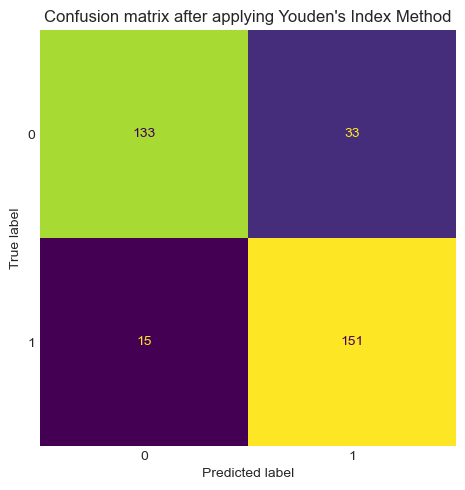

In [127]:
cm = confusion_matrix(ytest,y_pred_youden)
conf_mat = pd.DataFrame(cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
conf_mat
ConfusionMatrixDisplay(cm)
cm = confusion_matrix(ytest,y_pred_youden)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(colorbar=False)
plt.tight_layout()
plt.title("Confusion matrix after applying Youden's Index Method")
plt.margins(1)
plt.show()

**Compute various performance metrics using classification report.**

In [ ]:
eval_table = classification_report(ytest,y_pred_youden)
print(eval_table)

**Interpretation:** From the above output, write your inference.

- The model achieved an overall accuracy of 0.85, which means that it correctly predicted the class labels of 85% of the instances in the dataset.
- Looking at the precision and recall values, we can see that the model performed similarly for both classes.
- For class 0, the precision is 0.89 and the recall is 0.80, meaning that 89% of the instances classified as 0 were actually 0, and the model correctly identified 80% of all instances that were actually 0.
- For class 1, the precision is 0.82 and the recall is 0.90, meaning that 82% of the instances classified as 1 were actually 1, and the model correctly identified 90% of all instances that were actually 1.
- The f1-score gives an overall measure of the model's performance.The f1-score for class 0 is 0.84, and for class 1 is 0.86, indicating that the model has a similar overall performance for both classes

### Using the threshold value of 0.44 calculated by Youden's Index method, Class 1 F1_Score of the model increased from 82% to 86% and Class 0 F1_Score of the model increased from 82% to 84%